# Real estate cost and price prediction

#### Goal: Predict real estate construction cost and sale prices using linear regression

In [17]:
%matplotlib inline

# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load data

In [2]:
raw_data = pd.read_excel('Residential-Building-Data-Set.xlsx',header=1)

# Construct dataframe with target feature labels decoded and placed in the first two columns
price = raw_data['V-9']
cost = raw_data['V-10']
raw_data.drop(labels=['V-9','V-10'], axis=1,inplace = True)
re_df = raw_data
re_df.insert(0, 'Price', price)
re_df.insert(0, 'Cost', cost)
re_df.head()

,Cost,Price,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,...,V-20.4,V-21.4,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4
0,410,2200,81,1,85,1,1,3150.0,920.0,598.5,...,15,733.800000,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1
1,1000,5000,84,1,89,4,1,7600.0,1140.0,3040.0,...,15,1143.800000,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1
2,170,1200,78,1,81,4,1,4800.0,840.0,480.0,...,15,589.500000,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6
3,30,165,72,2,73,2,1,685.0,202.0,13.7,...,12,197.679557,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7
4,700,5500,87,1,90,2,1,3000.0,800.0,1230.0,...,14,2220.600000,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5


### Visualize the distribution of the two target variables and relationship to each other

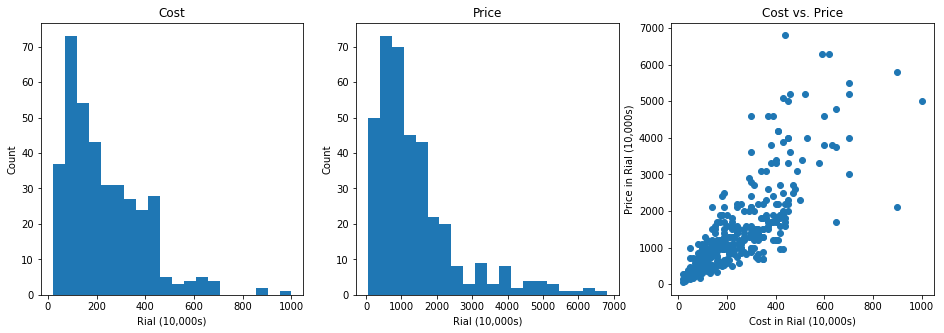

In [3]:
plt.figure(figsize=(16,5))
ax1 = plt.subplot(131);
plt.hist(re_df['Cost'],bins=20);
ax1.set_title('Cost');
ax1.set_xlabel('Rial (10,000s)');
ax1.set_ylabel('Count');

ax2 = plt.subplot(132);
plt.hist(re_df['Price'], bins=20);
ax2.set_title('Price');
ax2.set_xlabel('Rial (10,000s)');
ax2.set_ylabel('Count');

ax3 = plt.subplot(133);
plt.scatter(re_df['Cost'], re_df['Price']);
ax3.set_title('Cost vs. Price');
ax3.set_xlabel('Cost in Rial (10,000s)');
ax3.set_ylabel('Price in Rial (10,000s)');

### Visualize relationship between one potential predictor and target variables

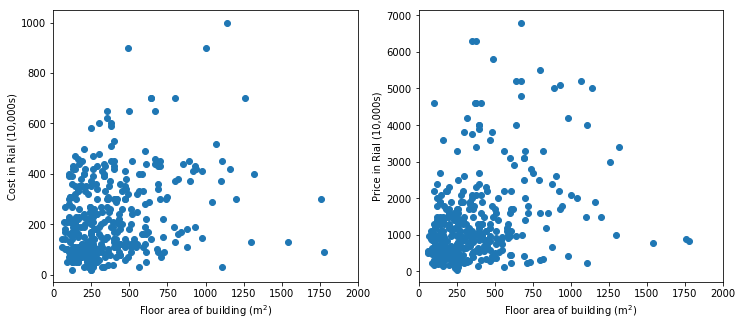

In [4]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121);
plt.scatter(re_df['V-3'],re_df['Cost']);
ax1.set_xlabel('Floor area of building (m$^2$)');
ax1.set_ylabel('Cost in Rial (10,000s)');
ax1.set_xlim(0,2000);

ax2 = plt.subplot(122);
plt.scatter(re_df['V-3'],re_df['Price']);
ax2.set_xlabel('Floor area of building (m$^2$)');
ax2.set_ylabel('Price in Rial (10,000s)');
ax2.set_xlim(0,2000);

### Create an initial regression model

In [5]:
# Create a linear regression object to predict cost and price
X = raw_data.drop(labels=['Cost','Price'], axis=1)
cost_lm = LinearRegression()
cost_lm.fit(X,cost);
price_lm = LinearRegression()
price_lm.fit(X,price);

In [6]:
# Create a df to store the coefficients
cost_coef = pd.DataFrame(zip(list(X),cost_lm .coef_), columns=['Feature','Coefficient'])
price_coef = pd.DataFrame(zip(list(X),price_lm .coef_), columns=['Feature','Coefficient'])
cost_coef.head() # View the coefficients

,Feature,Coefficient
0,START YEAR,0.013809
1,START QUARTER,-0.202014
2,COMPLETION YEAR,3.175645
3,COMPLETION QUARTER,0.974945
4,V-1,-0.208016


In [7]:
# Predict using the model
cost_pred = cost_lm.predict(X)
price_pred = price_lm.predict(X)

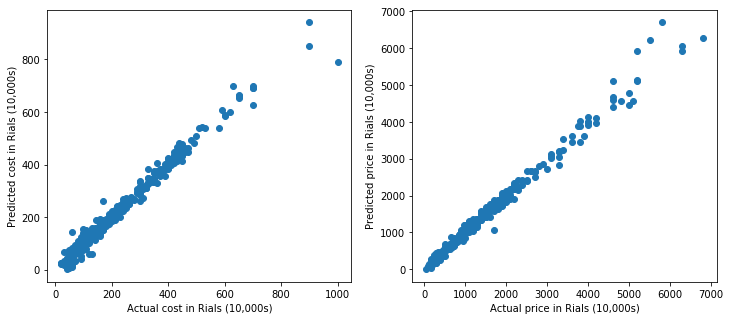

In [8]:
# Visualize predicted and actual cost and price
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121);
plt.scatter(cost,cost_pred);
ax1.set_xlabel('Actual cost in Rials (10,000s)');
ax1.set_ylabel('Predicted cost in Rials (10,000s)');

ax2 = plt.subplot(122);
plt.scatter(price,price_pred);
ax2.set_xlabel('Actual price in Rials (10,000s)');
ax2.set_ylabel('Predicted price in Rials (10,000s)');

In [9]:
# Calculate mean square error and root mean square error
mse_cost = np.mean((cost_pred-cost)**2)
rmse_cost = np.sqrt(mse_cost)

mse_price = np.mean((price_pred-price)**2)
rmse_price = np.sqrt(mse_price)

### Refit and evaluate model using training and validation sets

In [10]:
X_cost_train, X_cost_test, Y_cost_train, Y_cost_test = train_test_split(X,cost, test_size=0.25, random_state = 42)
X_price_train, X_price_test, Y_price_train, Y_price_test = train_test_split(X,price, test_size=0.25, random_state = 42)

# Retrain models using only train data set
cost_lm.fit(X_cost_train,Y_cost_train)
price_lm.fit(X_price_train,Y_price_train)

# Predict using test data set
cost_pred = cost_lm.predict(X_cost_test)
price_pred = price_lm.predict(X_price_test)

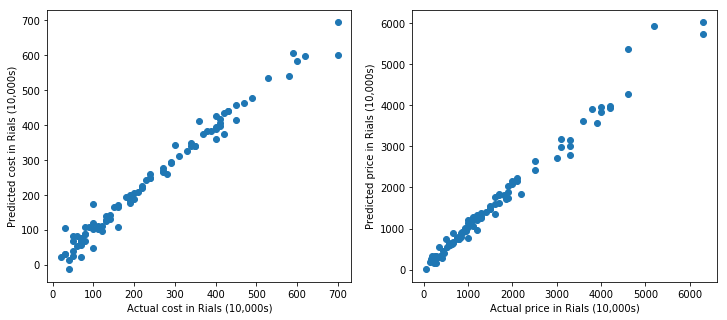

In [11]:
# Visualize predicted and actual values for cost and price
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121);
plt.scatter(Y_cost_test,cost_pred);
ax1.set_xlabel('Actual cost in Rials (10,000s)');
ax1.set_ylabel('Predicted cost in Rials (10,000s)');

ax2 = plt.subplot(122);
plt.scatter(Y_price_test,price_pred);
ax2.set_xlabel('Actual price in Rials (10,000s)');
ax2.set_ylabel('Predicted price in Rials (10,000s)');

In [12]:
# Calculate mean square error and root mean square error
mse_cost = np.mean((cost_pred-Y_cost_test)**2)
rmse_cost = np.sqrt(mse_cost)

mse_price = np.mean((price_pred-Y_price_test)**2)
rmse_price = np.sqrt(mse_price)

print 'The RMSE of cost is ' + str(round(rmse_cost,2)) + ' and of price is ' + str(round(rmse_price,2))

The RMSE of cost is 24.36 and of price is 188.38


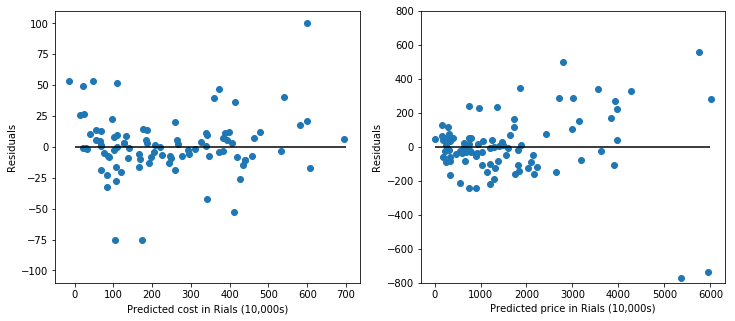

In [13]:
# Plot residuals
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121);
plt.scatter(cost_pred,Y_cost_test - cost_pred);
plt.hlines(y=0,xmin=0,xmax=700)
ax1.set_xlabel('Predicted cost in Rials (10,000s)');
ax1.set_ylabel('Residuals');
ax1.set_ylim(-110,110)

ax2 = plt.subplot(122);
plt.scatter(price_pred,Y_price_test - price_pred);
plt.hlines(y=0,xmin=0,xmax=6000)
ax2.set_xlabel('Predicted price in Rials (10,000s)');
ax2.set_ylabel('Residuals');
ax2.set_ylim(-800,800);